# Bike Sharing Data Exploration
### by Islam Mohamed

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading csv file into pandas dataframe
bikeshare_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bikeshare_df.shape, '\n')
print(bikeshare_df.dtypes, '\n')

(183412, 16) 

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object 



In [4]:
bikeshare_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### What is the structure of your dataset?

> There are 183,412 individual rides data in the dataset with 16 features;
> - Time; Trip Duration in seconds, Start Time, End Time
> - Departure and Destination; Start Station, End Station (ID, Name, Coordinates)
> - Bike; ID
> - User; Type, Birth Year, Gender

### The main feature of interest in the dataset

> I'm most interested in figuring out what features are best for predicting the number of trips taken, and the trip duration

### The Features in the dataset I think will help support the investigation into the feature of interest

> The features of the dataset we'll be exploring are;
> - The trip duration
> - The trip start time (summarized by day, weekday, and hour)
> - The user demographic data (subsription type, birth year, and gender)

## Assessing Data

In [5]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# descriptive statistics
bikeshare_df.describe(include='all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412.000000,183412,183412,183215.000000,183215,183412.000000,183412.000000,183215.000000,183215,183412.000000,183412.000000,183412.000000,183412,175147.000000,175147,183412
unique,NaN,183401,183397,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2019-02-15 08:43:18.4220,2019-02-06 18:22:42.3790,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163544,NaN,130651,166053
mean,726.078435,NaN,NaN,138.590427,NaN,37.771223,-122.352664,136.249123,NaN,37.771427,-122.352250,4472.906375,NaN,1984.806437,NaN,NaN
std,1794.389780,NaN,NaN,111.778864,NaN,0.099581,0.117097,111.515131,NaN,0.099490,0.116673,1664.383394,NaN,10.116689,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453704,3.000000,NaN,37.317298,-122.453704,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


## Cleaning Data
### Adressing Missing Data

In [7]:
# checking for NaN values
bikeshare_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
bikeshare_df[bikeshare_df.start_station_id.isnull()].isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           197
start_station_name         197
start_station_latitude       0
start_station_longitude      0
end_station_id             197
end_station_name           197
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            2
member_gender                2
bike_share_for_all_trip      0
dtype: int64

> All rows with null start station data are the same as the rows with null end station data

In [9]:
bikeshare_df[bikeshare_df.member_gender.isnull()].isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              2
start_station_name            2
start_station_latitude        0
start_station_longitude       0
end_station_id                2
end_station_name              2
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> All rows with null member gender data are the same as rows with null birthyear

In [10]:
# checking for available station_id within the dataset based on the coordinates

bikeshare_df[bikeshare_df.start_station_id.isnull()].start_station_longitude.value_counts()

-121.94    57
-121.96    46
-121.93    46
-121.95    37
-121.92    10
-121.98     1
Name: start_station_longitude, dtype: int64

In [11]:
bikeshare_df[bikeshare_df['start_station_longitude'] == -121.92].shape

(10, 16)

> All null values don't have corresponding data and are better dropped for cleaning purposes

In [12]:
# dropping rows with NaN values and saving changes into a new dataframe
bikeshare_clean = bikeshare_df.dropna(subset=['start_station_id', 'member_gender'], axis=0)
bikeshare_clean.reset_index(drop=True, inplace=True)

In [13]:
# confirming changes
bikeshare_clean.isnull().sum().any()

False

In [14]:
bikeshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### Dropping Extraneous Columns
- Drop unwanted columns in the dataset outside the feature of interest

In [15]:
# list all column names
list(bikeshare_clean)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [16]:
# dropping unwanted columns across the column (1) axis, in place
bikeshare_clean.drop(labels=['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name',
                             'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1, inplace=True)

C:\Users\islam\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
# confirm changes
bikeshare_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
115513,607,2019-02-11 16:16:36.1230,2019-02-11 16:26:43.5470,104.0,27.0,590,Subscriber,1992.0,Male
92420,583,2019-02-15 09:26:57.4080,2019-02-15 09:36:41.2470,134.0,59.0,1666,Subscriber,1982.0,Male
144236,449,2019-02-06 17:29:55.1660,2019-02-06 17:37:25.0980,30.0,15.0,5307,Subscriber,1957.0,Male
62716,889,2019-02-20 09:20:07.6870,2019-02-20 09:34:57.1710,25.0,41.0,4837,Subscriber,1979.0,Female
126308,1683,2019-02-09 05:49:44.9010,2019-02-09 06:17:47.9840,20.0,368.0,3651,Subscriber,1959.0,Male


### Modifying Datatypes
- Set datatype of the variables properly using `astype`

In [18]:
# checking datatypes
bikeshare_clean.dtypes

duration_sec           int64
start_time            object
end_time              object
start_station_id     float64
end_station_id       float64
bike_id                int64
user_type             object
member_birth_year    float64
member_gender         object
dtype: object

In [19]:
# setting start_time and end_time to datetime datatype for easier operations
bikeshare_clean.loc[:, 'start_time'] =  pd.to_datetime(bikeshare_clean.loc[:, 'start_time'])
bikeshare_clean.loc[:, 'end_time'] =  pd.to_datetime(bikeshare_clean.loc[:, 'end_time'])

C:\Users\islam\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [20]:
# confirming changes
bikeshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   duration_sec       174952 non-null  int64         
 1   start_time         174952 non-null  datetime64[ns]
 2   end_time           174952 non-null  datetime64[ns]
 3   start_station_id   174952 non-null  float64       
 4   end_station_id     174952 non-null  float64       
 5   bike_id            174952 non-null  int64         
 6   user_type          174952 non-null  object        
 7   member_birth_year  174952 non-null  float64       
 8   member_gender      174952 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 12.0+ MB


In [21]:
# convert dtypes
bikeshare_clean = bikeshare_clean.astype({'start_station_id':'int64', 'end_station_id':'int64', 'member_birth_year':'int64'})

In [22]:
# confirming changes
bikeshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   duration_sec       174952 non-null  int64         
 1   start_time         174952 non-null  datetime64[ns]
 2   end_time           174952 non-null  datetime64[ns]
 3   start_station_id   174952 non-null  int64         
 4   end_station_id     174952 non-null  int64         
 5   bike_id            174952 non-null  int64         
 6   user_type          174952 non-null  object        
 7   member_birth_year  174952 non-null  int64         
 8   member_gender      174952 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 12.0+ MB


### Setting categorical variables
- for `user_type` and `member_gender`

In [23]:
user_cat = bikeshare_clean['user_type'].value_counts()
user_cat

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [24]:
gender_cat = bikeshare_clean['member_gender'].value_counts()
gender_cat

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [25]:
# converting user_type, member_gender into categorical types
bikeshare_clean['user_type'] = bikeshare_clean['user_type'].astype(pd.api.types.CategoricalDtype(categories=user_cat.index))

In [26]:
bikeshare_clean.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [27]:
bikeshare_clean['member_gender'] = bikeshare_clean['member_gender'].astype(pd.api.types.CategoricalDtype(categories=gender_cat.index))

In [28]:
bikeshare_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [29]:
# confirming changes
bikeshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   duration_sec       174952 non-null  int64         
 1   start_time         174952 non-null  datetime64[ns]
 2   end_time           174952 non-null  datetime64[ns]
 3   start_station_id   174952 non-null  int64         
 4   end_station_id     174952 non-null  int64         
 5   bike_id            174952 non-null  int64         
 6   user_type          174952 non-null  category      
 7   member_birth_year  174952 non-null  int64         
 8   member_gender      174952 non-null  category      
dtypes: category(2), datetime64[ns](2), int64(5)
memory usage: 9.7 MB


## Feature Engineering
### Adding columns for Trip Weekday, and Hour

In [30]:
# adding columns using datetime methods
bikeshare_clean['weekday']= bikeshare_clean['start_time'].dt.day_name()
bikeshare_clean['hour']= bikeshare_clean['start_time'].dt.hour

In [31]:
bikeshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   duration_sec       174952 non-null  int64         
 1   start_time         174952 non-null  datetime64[ns]
 2   end_time           174952 non-null  datetime64[ns]
 3   start_station_id   174952 non-null  int64         
 4   end_station_id     174952 non-null  int64         
 5   bike_id            174952 non-null  int64         
 6   user_type          174952 non-null  category      
 7   member_birth_year  174952 non-null  int64         
 8   member_gender      174952 non-null  category      
 9   weekday            174952 non-null  object        
 10  hour               174952 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(6), object(1)
memory usage: 12.3+ MB


In [32]:
bikeshare_clean.weekday.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: weekday, dtype: int64

In [33]:
# converting weekday into ordered categorical type
weekday_cat = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bikeshare_clean['weekday'] = bikeshare_clean['weekday'].astype(pd.api.types.CategoricalDtype(ordered=True,
                                                                                             categories=weekday_cat))

In [34]:
bikeshare_clean.weekday.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: weekday, dtype: int64

In [35]:
bikeshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   duration_sec       174952 non-null  int64         
 1   start_time         174952 non-null  datetime64[ns]
 2   end_time           174952 non-null  datetime64[ns]
 3   start_station_id   174952 non-null  int64         
 4   end_station_id     174952 non-null  int64         
 5   bike_id            174952 non-null  int64         
 6   user_type          174952 non-null  category      
 7   member_birth_year  174952 non-null  int64         
 8   member_gender      174952 non-null  category      
 9   weekday            174952 non-null  category      
 10  hour               174952 non-null  int64         
dtypes: category(3), datetime64[ns](2), int64(6)
memory usage: 11.2 MB


In [36]:
# confirming changes
bikeshare_clean

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,weekday,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,Thursday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,Thursday,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,4898,Subscriber,1974,Male,Thursday,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,323,5200,Subscriber,1959,Male,Thursday,23
...,...,...,...,...,...,...,...,...,...,...,...
174947,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,324,4832,Subscriber,1996,Male,Friday,0
174948,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,66,4960,Subscriber,1984,Male,Friday,0
174949,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,277,3824,Subscriber,1990,Male,Friday,0
174950,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,216,5095,Subscriber,1988,Male,Friday,0


In [37]:
# confirming changes
bikeshare_clean.describe(datetime_is_numeric=True)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,member_birth_year,hour
count,174952.000000,174952,174952,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,2019-02-15 21:27:05.282477568,2019-02-15 21:38:49.784196864,139.002126,136.604486,4482.587555,1984.803135,13.456165
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,3.000000,11.000000,1878.000000,0.000000
25%,323.000000,2019-02-08 08:32:16.954250240,2019-02-08 08:42:33.415499776,47.000000,44.000000,3799.000000,1980.000000,9.000000
50%,510.000000,2019-02-15 22:20:21.685499904,2019-02-15 22:33:41.234500096,104.000000,101.000000,4960.000000,1987.000000,14.000000
75%,789.000000,2019-02-22 11:22:05.289500160,2019-02-22 11:37:06.322249984,239.000000,238.000000,5505.000000,1992.000000,17.000000
max,84548.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,398.000000,398.000000,6645.000000,2001.000000,23.000000
std,1642.204905,NaN,NaN,111.648819,111.335635,1659.195937,10.118731,4.734282


## Univariate Exploration

### Trip Duration
- Starting by looking at the distribution of the trip duration

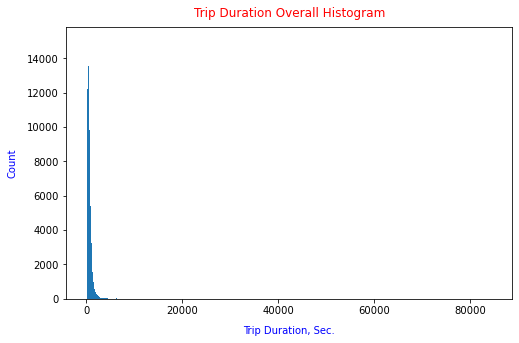

In [38]:
# starting with a standard-scaled plot
bins = np.arange(0, bikeshare_clean['duration_sec'].max()+60, 60)
plt.figure(figsize=[8, 5])
plt.hist(data = bikeshare_clean, x = 'duration_sec', bins=bins)
plt.xlabel('Trip Duration, Sec.', labelpad=10, color='blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Trip Duration Overall Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

The initial plot of the duration shows that most of the data is set to the far left of the axis, suggesting some strong outliers on the right. As seen from the descriptive summary and the plot. There are some outliers way above the distribution, so will limit the view and reduce bin size.

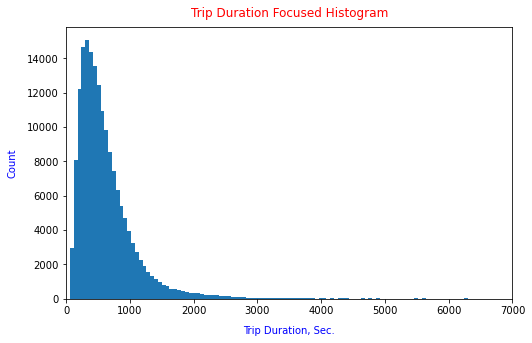

In [39]:
bins = np.arange(0, bikeshare_clean['duration_sec'].max()+60, 60)

plt.figure(figsize=[8, 5])
plt.hist(data = bikeshare_clean, x = 'duration_sec', bins=bins)
plt.xlim(0, 7000)
plt.xlabel('Trip Duration, Sec.', labelpad=10, color='blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Trip Duration Focused Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

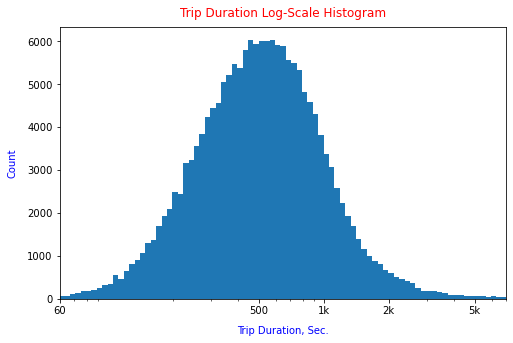

In [40]:
# Univarite plot of the trip duration distribution
log_binsize = 0.025
bins = 10 ** np.arange(.05, np.log10(bikeshare_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikeshare_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([60, 500, 1e3, 2e3, 5e3, 10e4], [60, 500, '1k', '2k', '5k', '10k'])
plt.xlim(60, 7000);
plt.xlabel('Trip Duration, Sec.', labelpad=10, color='blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Trip Duration Log-Scale Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

Duration has a long-tailed distribution, with a lot of rides on the low duration end, and few on the high end. When plotted on 
a log-scale, the duration distribution is normal, with most trips having duration around 500 seconds

In [41]:
# selecting high outliers, using criteria eyeballed from the plots

high_outliers = (bikeshare_clean['duration_sec'] > 7000)
high_outliers.sum()

557

In [42]:
bikeshare_clean.loc[high_outliers,:]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,weekday,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,Thursday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,Thursday,17
192,15123,2019-02-28 18:23:19.035,2019-02-28 22:35:22.294,28,368,5380,Subscriber,1980,Male,Thursday,18
287,13061,2019-02-28 18:28:18.728,2019-02-28 22:05:59.954,19,19,5830,Subscriber,1987,Male,Thursday,18
...,...,...,...,...,...,...,...,...,...,...,...
170209,31203,2019-02-01 08:40:28.487,2019-02-01 17:20:31.553,78,11,5110,Subscriber,1989,Male,Friday,8
170428,14321,2019-02-01 12:50:10.691,2019-02-01 16:48:51.797,263,254,4642,Customer,1977,Other,Friday,12
170435,12894,2019-02-01 13:13:12.725,2019-02-01 16:48:07.003,5,5,5105,Subscriber,1996,Other,Friday,13
171454,10568,2019-02-01 10:08:37.189,2019-02-01 13:04:45.198,364,20,5561,Subscriber,1989,Male,Friday,10


In [43]:
# checking for errors in duration calculation
x = (bikeshare_clean.loc[high_outliers,:].end_time - bikeshare_clean.loc[high_outliers,:].start_time).dt.seconds
y = bikeshare_clean.loc[high_outliers,:].duration_sec
(x != y).sum()

0

> No errors in trip duration calculation. These duration data are accurate and will be considered part of our valid data

### Trip Start Time
- We'll now explore the trip start time distribution over the month, weekdays, and day hours

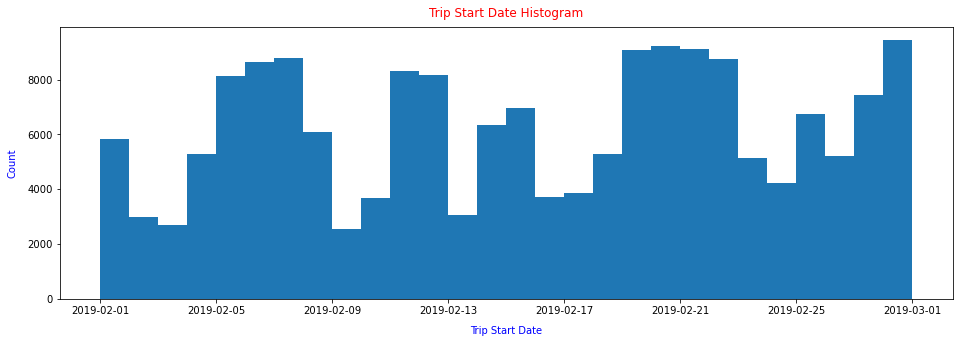

In [44]:
# Plotting by date
plt.figure(figsize=[16, 5])
plt.hist(data = bikeshare_clean, x = 'start_time', bins=28)
plt.xlabel('Trip Start Date', labelpad=10, color='blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Trip Start Date Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

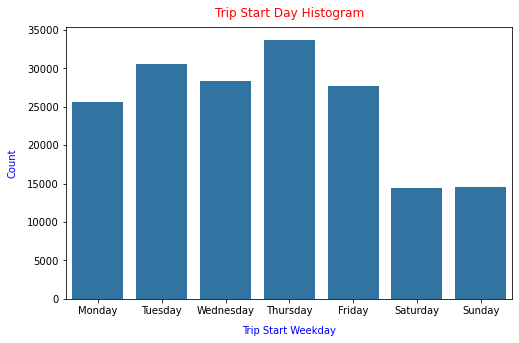

In [45]:
# plotting by weekday
plt.figure(figsize=[8, 5])
sb.countplot(data = bikeshare_clean, x = 'weekday', color = sb.color_palette()[0])
plt.xlabel('Trip Start Weekday', labelpad=10, color='blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Trip Start Day Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

We can see that the lowest trip count was observed on weekends and higher trip counts were happening during weekdays with Thursday being the highest. Weekend engagement is almost 50% of that of an average weekday.

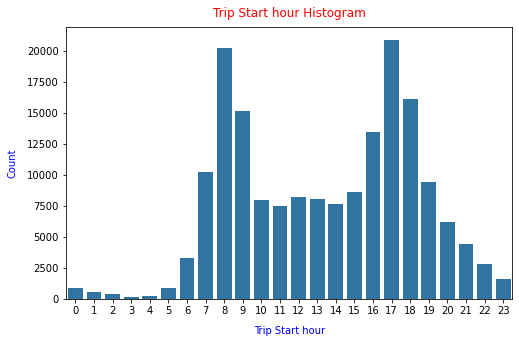

In [46]:
# plotting by hour
plt.figure(figsize=[8, 5])
sb.countplot(data = bikeshare_clean, x = 'hour', color = sb.color_palette()[0])
plt.xlabel('Trip Start hour', labelpad=10, color='blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Trip Start hour Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

We can that the distribution of trips along the day is bimodal with one peak at 8:00 AM and another at 05:00 PM, with the lowest number of trips were taken after midnight

### User Data

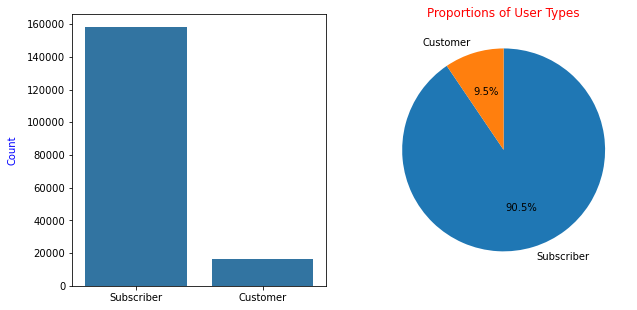

In [47]:
# plotting for User Types
plt.figure(figsize=[10, 5]);

plt.subplot(1,2,1)
sb.countplot(data = bikeshare_clean, x='user_type', color=sb.color_palette()[0]);
plt.xlabel('')
plt.ylabel('Count', labelpad=10, color='Blue')

plt.subplot(1,2,2)
x = bikeshare_clean.user_type.value_counts().values
i = bikeshare_clean.user_type.value_counts().index
plt.pie(x, labels=i, autopct='%1.1f%%', startangle=90, counterclock=False);
plt.title('Proportions of User Types', color='red');

> 90% of the trips are taken by subscribers

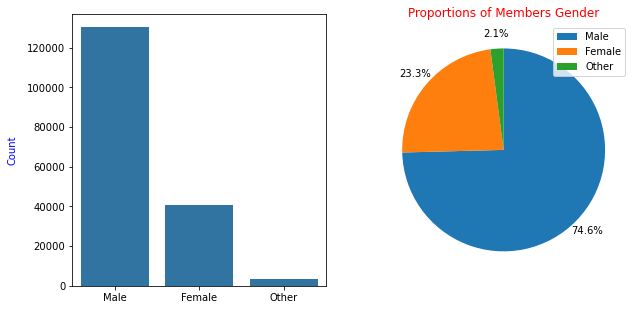

In [48]:
# plotting for User Gender
plt.figure(figsize=[10, 5]);

plt.subplot(1,2,1)
sb.countplot(data = bikeshare_clean, x='member_gender', color=sb.color_palette()[0]);
plt.xlabel('')
plt.ylabel('Count', labelpad=10, color='Blue')

plt.subplot(1,2,2)
x = bikeshare_clean.member_gender.value_counts().values
i = bikeshare_clean.member_gender.value_counts().index
plt.pie(x, labels=i, autopct='%1.1f%%', pctdistance=1.15, startangle=90, counterclock=False, labeldistance=None)
plt.title('Proportions of Members Gender', color='red');
plt.legend();

> Almost 75% of trip takers are males

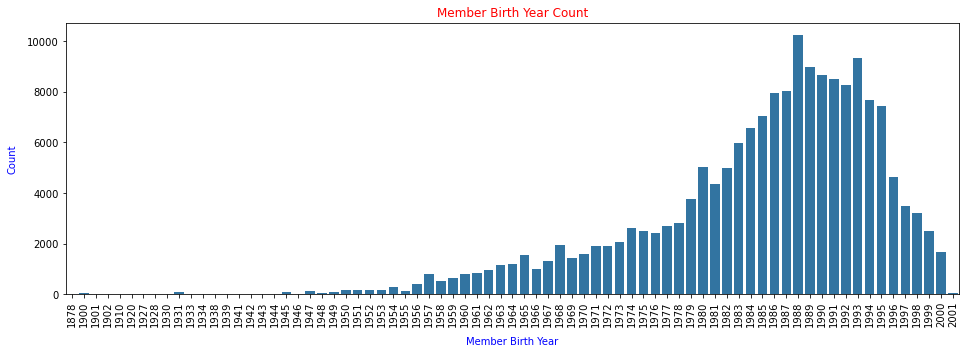

In [49]:
# plotting for User Birth Year
plt.figure(figsize=[16, 5]);

sb.countplot(data = bikeshare_clean, x='member_birth_year', color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.xlabel('Member Birth Year', labelpad=10, color='Blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Member Birth Year Count', color='red');

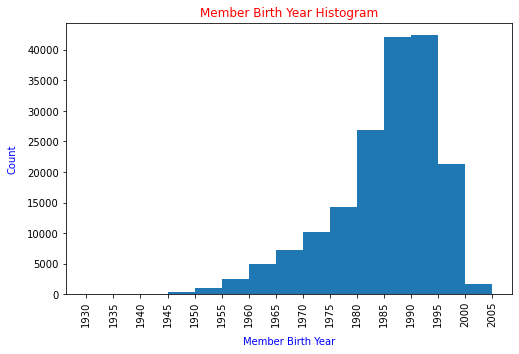

In [50]:
# plotting for User Birth Year, binned by age groups
plt.figure(figsize=[8, 5]);
bins=np.arange(1930, bikeshare_clean['member_birth_year'].max()+5, 5)

plt.hist(data = bikeshare_clean, x='member_birth_year', bins=bins);
plt.xticks(bins, rotation=90);
plt.xlabel('Member Birth Year', labelpad=10, color='Blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Member Birth Year Histogram', color='red');

In [51]:
# selecting outliers, using criteria eyeballed from the plots
outliers = (bikeshare_clean['member_birth_year'] < 1930)
outliers.sum()

77

In [52]:
bikeshare_clean.loc[outliers,:]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,weekday,hour
1238,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,173,5391,Subscriber,1900,Male,Thursday,19
10407,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343,375,6249,Subscriber,1900,Male,Wednesday,19
15483,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375,36,4968,Subscriber,1900,Male,Wednesday,8
17320,366,2019-02-26 19:53:38.528,2019-02-26 19:59:44.968,50,21,5226,Subscriber,1920,Male,Tuesday,19
18197,432,2019-02-26 17:48:59.016,2019-02-26 17:56:11.370,21,50,5319,Subscriber,1920,Male,Tuesday,17
...,...,...,...,...,...,...,...,...,...,...,...
165796,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375,36,5445,Subscriber,1900,Male,Sunday,9
169534,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343,375,5286,Subscriber,1900,Male,Friday,19
169703,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25,30,2175,Subscriber,1902,Female,Friday,18
174402,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,284,67,5031,Subscriber,1901,Male,Friday,7


> There is no way to tell whether this data is accurate or not, and it would not affect our findings, so we will just limit the plot view

> Most trips are taken by people in their late twenties and early therties (birth year 1988-1994)

### The distributions of variables of interest

- **Trip Duration** has a long-tailed distribution, with a lot of rides on the low duration end, and few on the high end. When plotted on a log-scale, the duration distribution is normal, with most trips having duration around 500 seconds
<br><br>
- **Trip Date** distributions show that lower trip count was observed on weekends and higher trip counts were happening during weekdays with Thursday being the highest. Weekend engagement is almost 50% of that of an average weekday.
- On another hand, trip distribution along the day is bimodal with one peak at 8:00 AM and another at 05:00 PM, and the lowest number of trips are taken after midnight
<br><br>
- **User Data** distributions show that 90% of rides were taken by subscribers, 75% of riders are males, and that most trips are taken by people in their late twenties and early therties (birth year 1988-1994)

### Unusual Distributions and Data Outliers

- **Trip Duration:** The initial plot of the duration shows that most of the data is set to the far left of the axis, suggesting some strong outliers on the right, as seen from the descriptive summary and the plot. Checking the calculation of trip duration against the start and end trip time showed no errors in trip duration calculation.
<br><br>
- **User Birth Year** showed some value outliers, specially years older that 1940. There is no way to tell whether this data is accurate or not, and it would not affect our findings.

## Bivariate Exploration

### Duration VS. Trip Date
First, I want to see the relation between the trip duration and the time of the trip

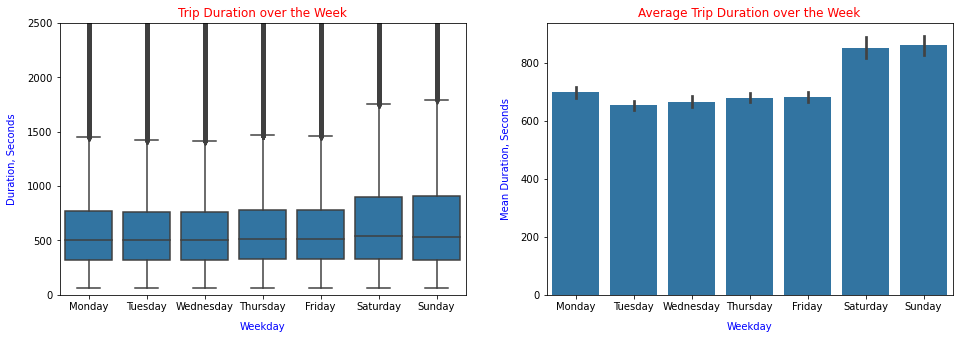

In [53]:
# bivariate plot of duration, mean duration vs. weekday
fig, ax = plt.subplots(ncols=2, figsize = [16,5])

sb.boxplot(data=bikeshare_clean, x='weekday', y='duration_sec', color=sb.color_palette()[0], ax=ax[0])
ax[0].set_ylim(0, 2500);
ax[0].set_xlabel('Weekday', labelpad=10, color='Blue')
ax[0].set_ylabel('Duration, Seconds', labelpad=10, color='Blue')
ax[0].set_title('Trip Duration over the Week', color='red');

sb.barplot(data=bikeshare_clean, x='weekday', y='duration_sec', color=sb.color_palette()[0], ax=ax[1])
ax[1].set_xlabel('Weekday', labelpad=10, color='Blue')
ax[1].set_ylabel('Mean Duration, Seconds', labelpad=10, color='Blue')
ax[1].set_title('Average Trip Duration over the Week', color='red');

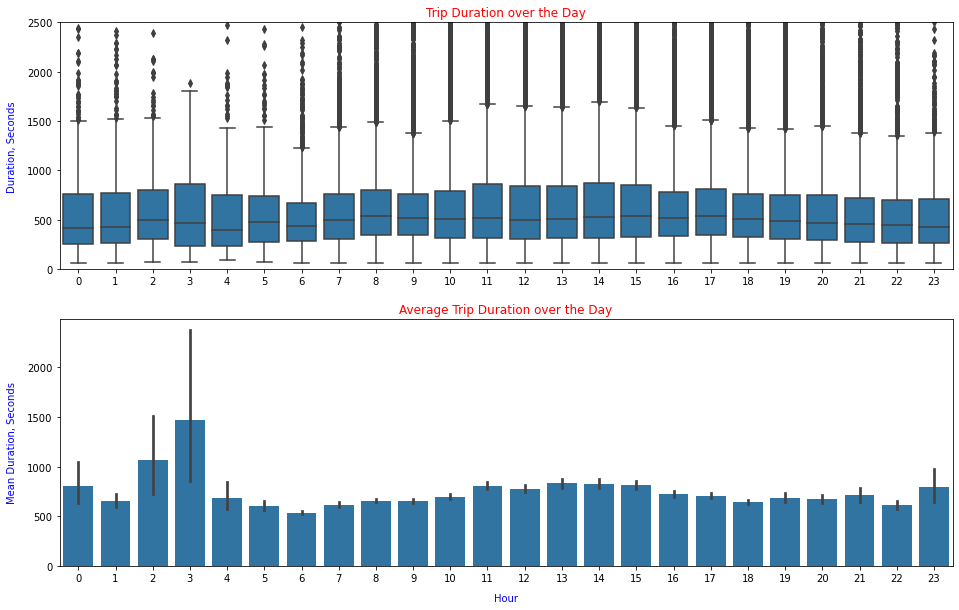

In [54]:
# bivariate plot of duration, mean duration vs. hour
fig, ax = plt.subplots(nrows=2, figsize = [16,10])

sb.boxplot(data=bikeshare_clean, x='hour', y='duration_sec', color=sb.color_palette()[0], ax=ax[0])
ax[0].set_ylim(0, 2500);
ax[0].set_xlabel('')
ax[0].set_ylabel('Duration, Seconds', labelpad=10, color='Blue')
ax[0].set_title('Trip Duration over the Day', color='red');

sb.barplot(data=bikeshare_clean, x='hour', y='duration_sec', color=sb.color_palette()[0], ax=ax[1])
ax[1].set_xlabel('Hour', labelpad=10, color='Blue')
ax[1].set_ylabel('Mean Duration, Seconds', labelpad=10, color='Blue')
ax[1].set_title('Average Trip Duration over the Day', color='red');

> An interesting observation is made here is that the average trip duration actually increases on weekend and at late hours after midnight. These are the same times that were previously observed to have the lowest number of rides.

### Duration VS. User Data
Now lets see if the user data has any relation with the trip duration

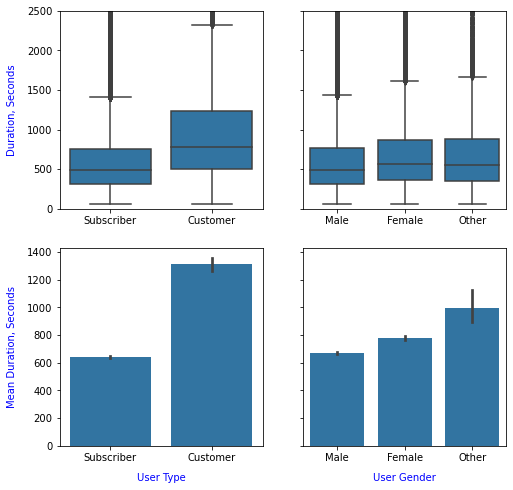

In [55]:
# bivariate plots of duration, mean duration vs. user_type, member_gender
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [8,8], sharey='row')

sb.boxplot(data=bikeshare_clean, x='user_type', y='duration_sec', color=sb.color_palette()[0], ax=ax[0,0]).set(xlabel="")
sb.boxplot(data=bikeshare_clean, x='member_gender', y='duration_sec', color=sb.color_palette()[0], ax=ax[0,1]).set(ylabel="",xlabel="")
sb.barplot(data=bikeshare_clean, x='user_type', y='duration_sec', color=sb.color_palette()[0], ax=ax[1,0])
sb.barplot(data=bikeshare_clean, x='member_gender', y='duration_sec', color=sb.color_palette()[0], ax=ax[1,1]).set(ylabel="")

ax[0,0].set_ylim(0, 2500);
ax[0,0].set_ylabel('Duration, Seconds', labelpad=10, color='Blue')
ax[1,0].set_xlabel('User Type', labelpad=10, color='Blue')
ax[1,0].set_ylabel('Mean Duration, Seconds', labelpad=10, color='Blue')
ax[1,1].set_xlabel('User Gender', labelpad=10, color='Blue');

> - The mean ride duration is higher for females than males
> - Customers tend to take longer rides than Subscribers

### Relationships between features of interest and other features in the dataset

- An interesting observation is made here is that the average trip duration actually increases on weekend and at late hours after midnight. These are the same times that were previously observed to have the lowest number of rides.
- The mean ride duration is higher for females than males
- Customers tend to take longer rides than Subscribers

### Relationships between  other features

- There is a huge drop in subscribers rides in the weekend

## Multivariate Exploration

### Trip Time VS. User Data

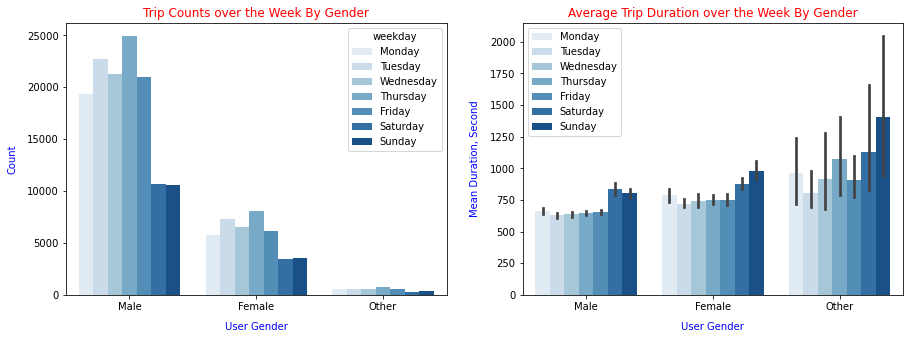

In [56]:
# plotting for User Gender
plt.figure(figsize=[15, 5]);

plt.subplot(1,2,1)
sb.countplot(data = bikeshare_clean, x='member_gender', hue='weekday', palette='Blues');
plt.xlabel('User Gender', labelpad=10, color='Blue')
plt.ylabel('Count', labelpad=10, color='Blue')
plt.title('Trip Counts over the Week By Gender', color='red');

plt.subplot(1,2,2)
sb.barplot(data = bikeshare_clean, x='member_gender', y='duration_sec', hue='weekday', palette='Blues');
plt.xlabel('User Gender', labelpad=10, color='Blue')
plt.ylabel('Mean Duration, Second', labelpad=10, color='Blue')
plt.title('Average Trip Duration over the Week By Gender', color='red');
plt.legend();

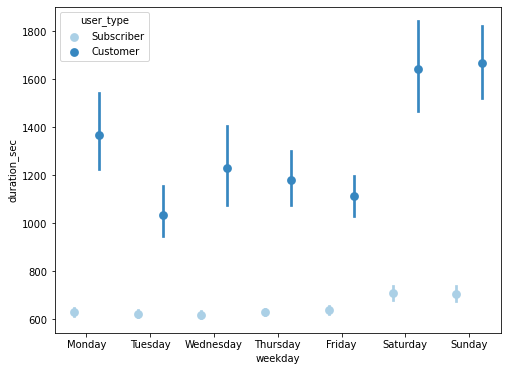

In [57]:
plt.figure(figsize = [8,6])
sb.pointplot(data = bikeshare_clean, x = 'weekday', y = 'duration_sec', hue = 'user_type', palette = 'Blues',
             linestyles = '', dodge = 0.4, join=True);

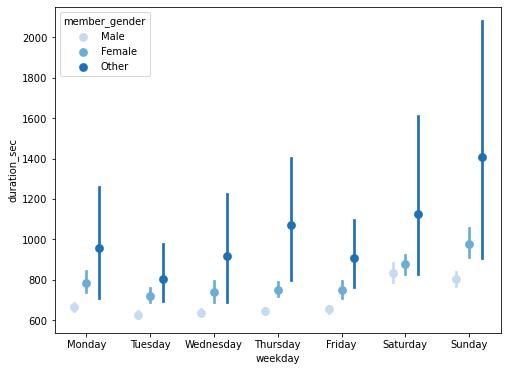

In [58]:
plt.figure(figsize = [8,6])
sb.pointplot(data = bikeshare_clean, x = 'weekday', y = 'duration_sec', hue = 'member_gender', palette = 'Blues',
             linestyles = '', dodge = 0.4, join=True);

> It is very clear now that customers make longer trips than subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Extending the exploration of the main feature of interest (trip duration) showed strong correlation to the user type and the ride time

## Findings Summary
The following findings can be fairly made from the exploration detailed above;

#### Average bike ride duration is less than 10 mins
As observed, the ride duration has a long-tailed distribution, with a lot of rides on the low duration end, and few on the high end. When plotted on a log-scale, the duration distribution is normal, with most trips having duration around 500 seconds

#### Most rides are taken during weekdays
Trip Date distributions show that lower trip count was observed on weekends and higher trip counts were happening during weekdays with Thursday being the highest. Weekend engagement is almost 50% of that of an average weekday.

#### Bike-sharing also has rush hours
On another hand, trip distribution along the day is bimodal with one peak at **8:00 AM** and another at **05:00 PM**

#### Bike riders are mostly young males, but strong rides aren't
As observed, 75% of riders are males, and that most trips are taken by people in their late twenties and early therties (birth year 1988-1994). However, longer trips are made by females and other genders than males.